# 📊 Análisis de resultados de modelos predictivos
Este notebook carga las métricas de diferentes modelos (SVR, RF, LSTM, etc.) evaluados en distintos horizontes de predicción y genera gráficos comparativos.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Cargar archivo CSV con métricas
df = pd.read_csv("../outputs/metrics.csv")



In [28]:

# Seteo de estilo general para alta calidad
sns.set_theme(style="whitegrid", font_scale=1.2)
plt.rcParams['figure.dpi'] = 300

## 📈 Gráficos de MAE, RMSE y NRMSE por modelo y semanas de predicción

/var/folders/bx/bkqd8jm57437t30_zs7693sm0000gn/T/ipykernel_97952/1805814772.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


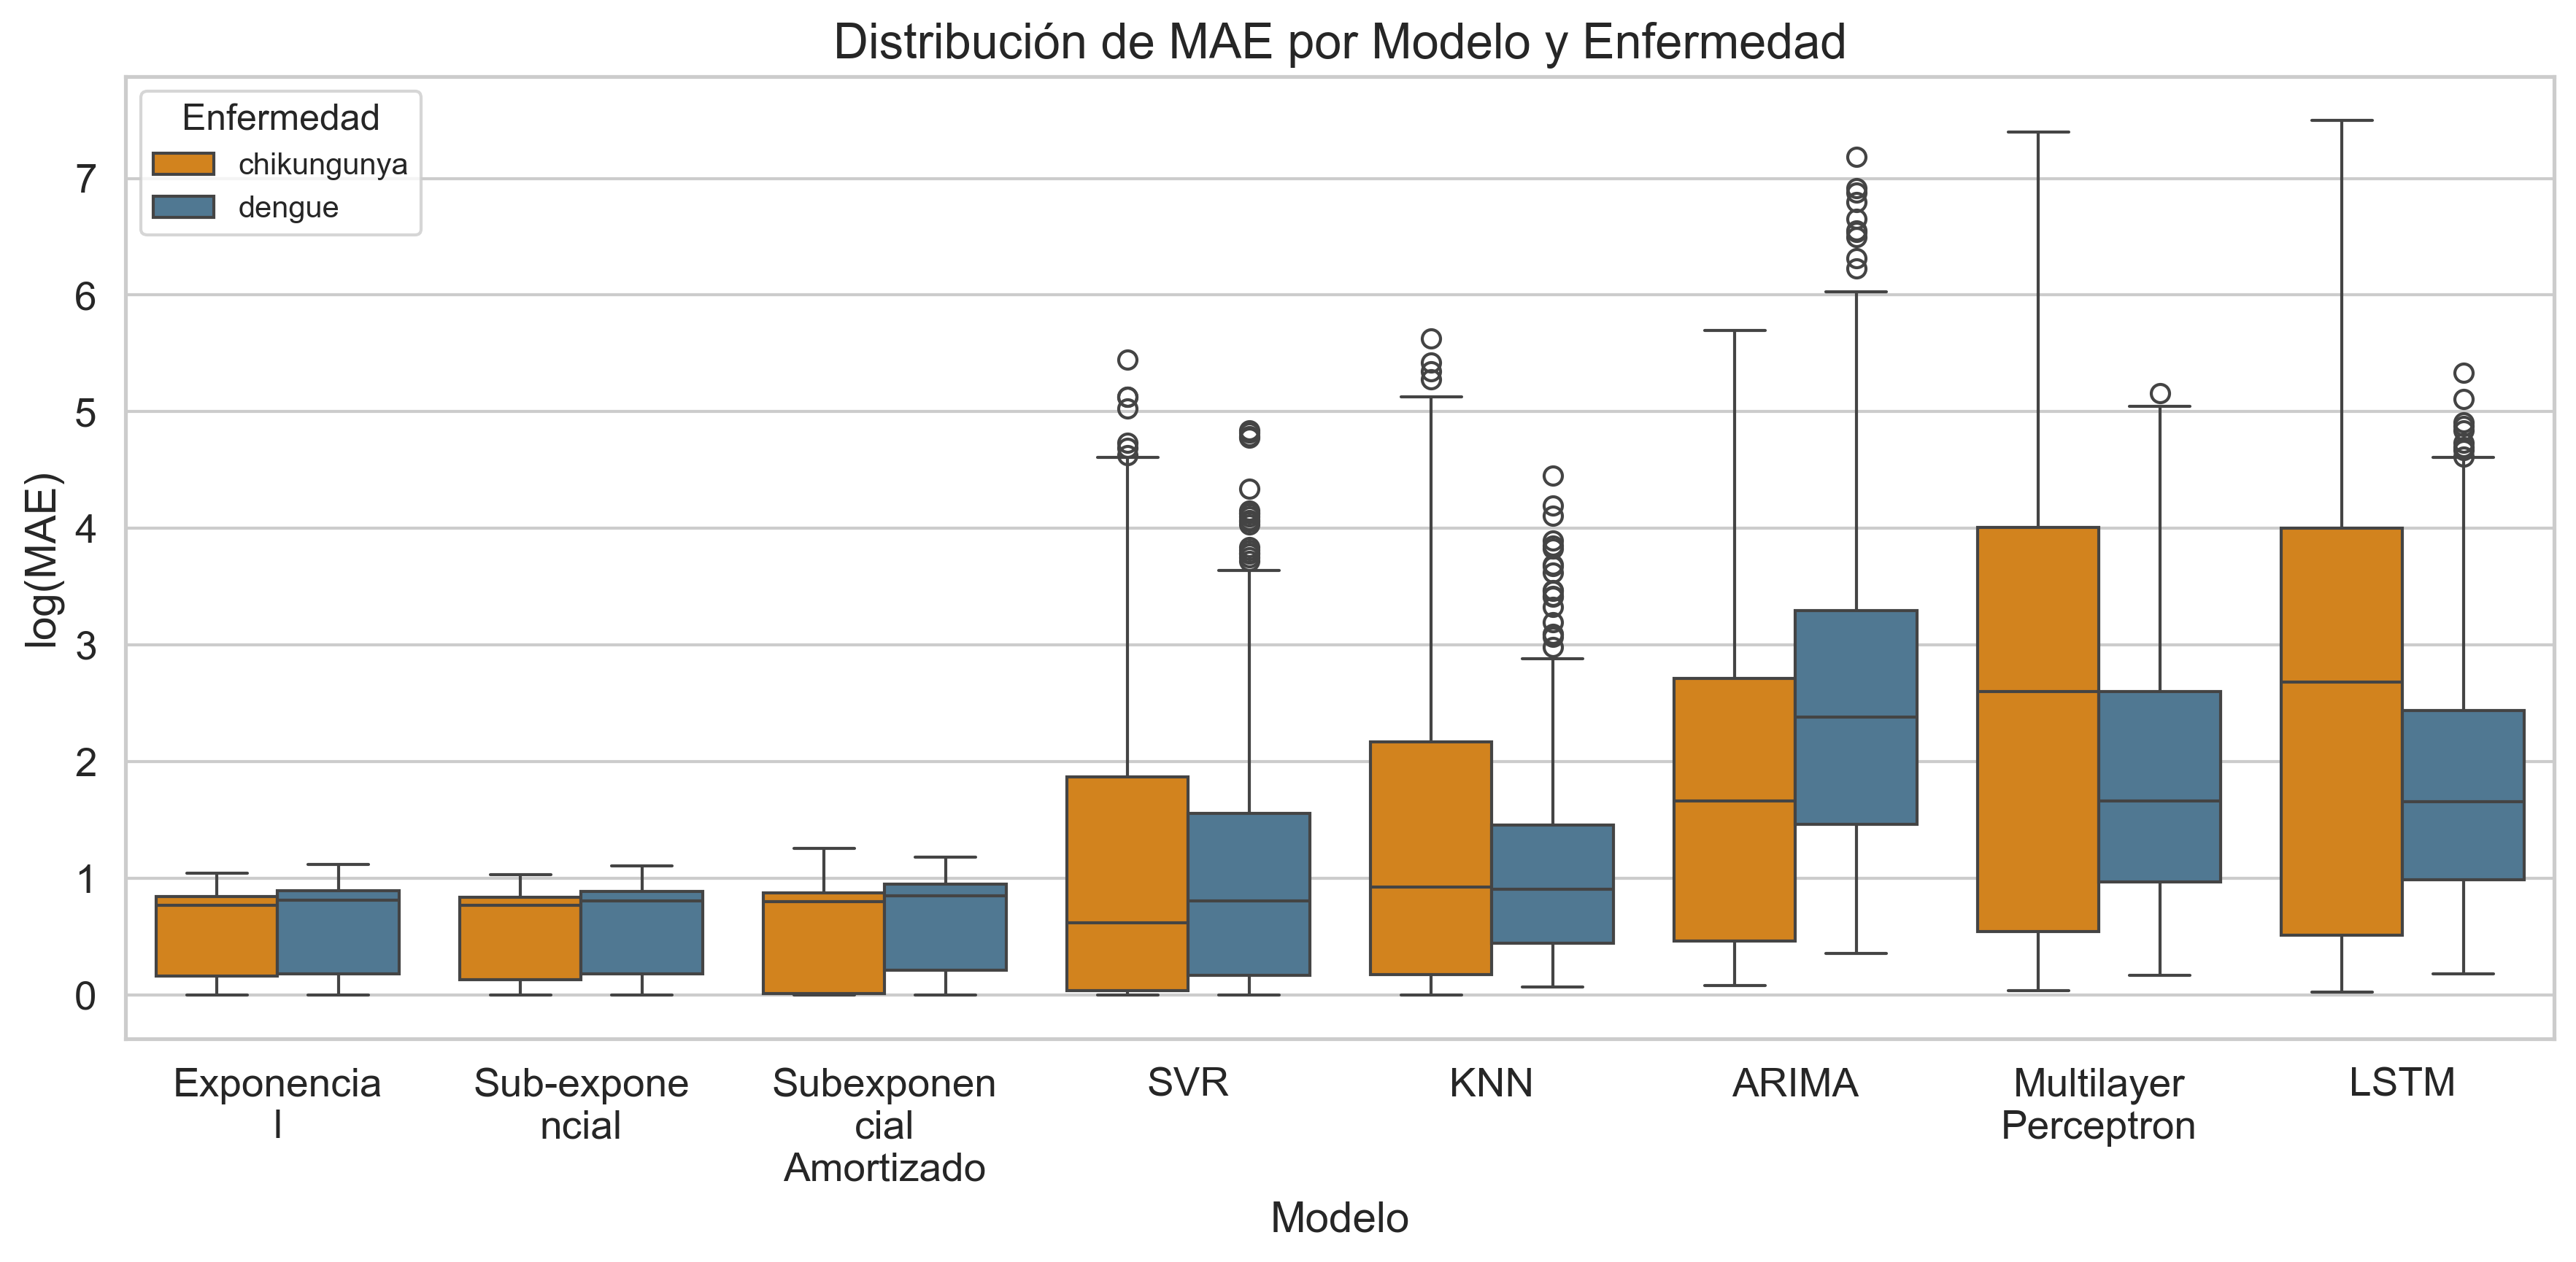

In [31]:
df['log_MAE'] = np.log1p(df['MAE'])
# Colores personalizados
palette = {"chikungunya": "#F08700", "dengue": "#457B9D"}

plt.figure(figsize=(12, 6))
orden_metodos = ["exponential", "subexponential", "subexponential amortized",
                 "svr", "knn", "autoarima", "mlp", "lstm"]

ax = sns.boxplot(
    data=df,
    x="Method",
    y="log_MAE",
    hue="Disease",
    palette=palette,
    order= orden_metodos
)

# Cambiar etiquetas del eje X a nombres más descriptivos
new_labels = {
    "exponential": "Exponencial",
    "subexponential": "Sub-exponencial",
    "subexponential amortized": "Subexponencial Amortizado",
    "autoarima": "ARIMA",
    "svr": "SVR",
    "knn": "KNN",
    "mlp": "Multilayer Perceptron",
    "lstm": "LSTM",

}

# Obtener las posiciones y aplicar los nuevos labels
labels = [textwrap.fill(new_labels.get(label.get_text(), label.get_text()), width=10)
          for label in ax.get_xticklabels()]
ax.set_xticklabels(labels)

# Títulos y etiquetas
ax.set_title("Distribución de MAE por Modelo y Enfermedad", fontsize=16)
ax.set_xlabel("Modelo", fontsize=14)
ax.set_ylabel("log(MAE)", fontsize=14)

# Leyenda más clara
ax.legend(title="Enfermedad", title_fontsize=12, fontsize=10)

plt.tight_layout()
plt.savefig("boxplot_mae_method_disease.png", dpi=300)
plt.show()



/var/folders/bx/bkqd8jm57437t30_zs7693sm0000gn/T/ipykernel_97952/1333214133.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


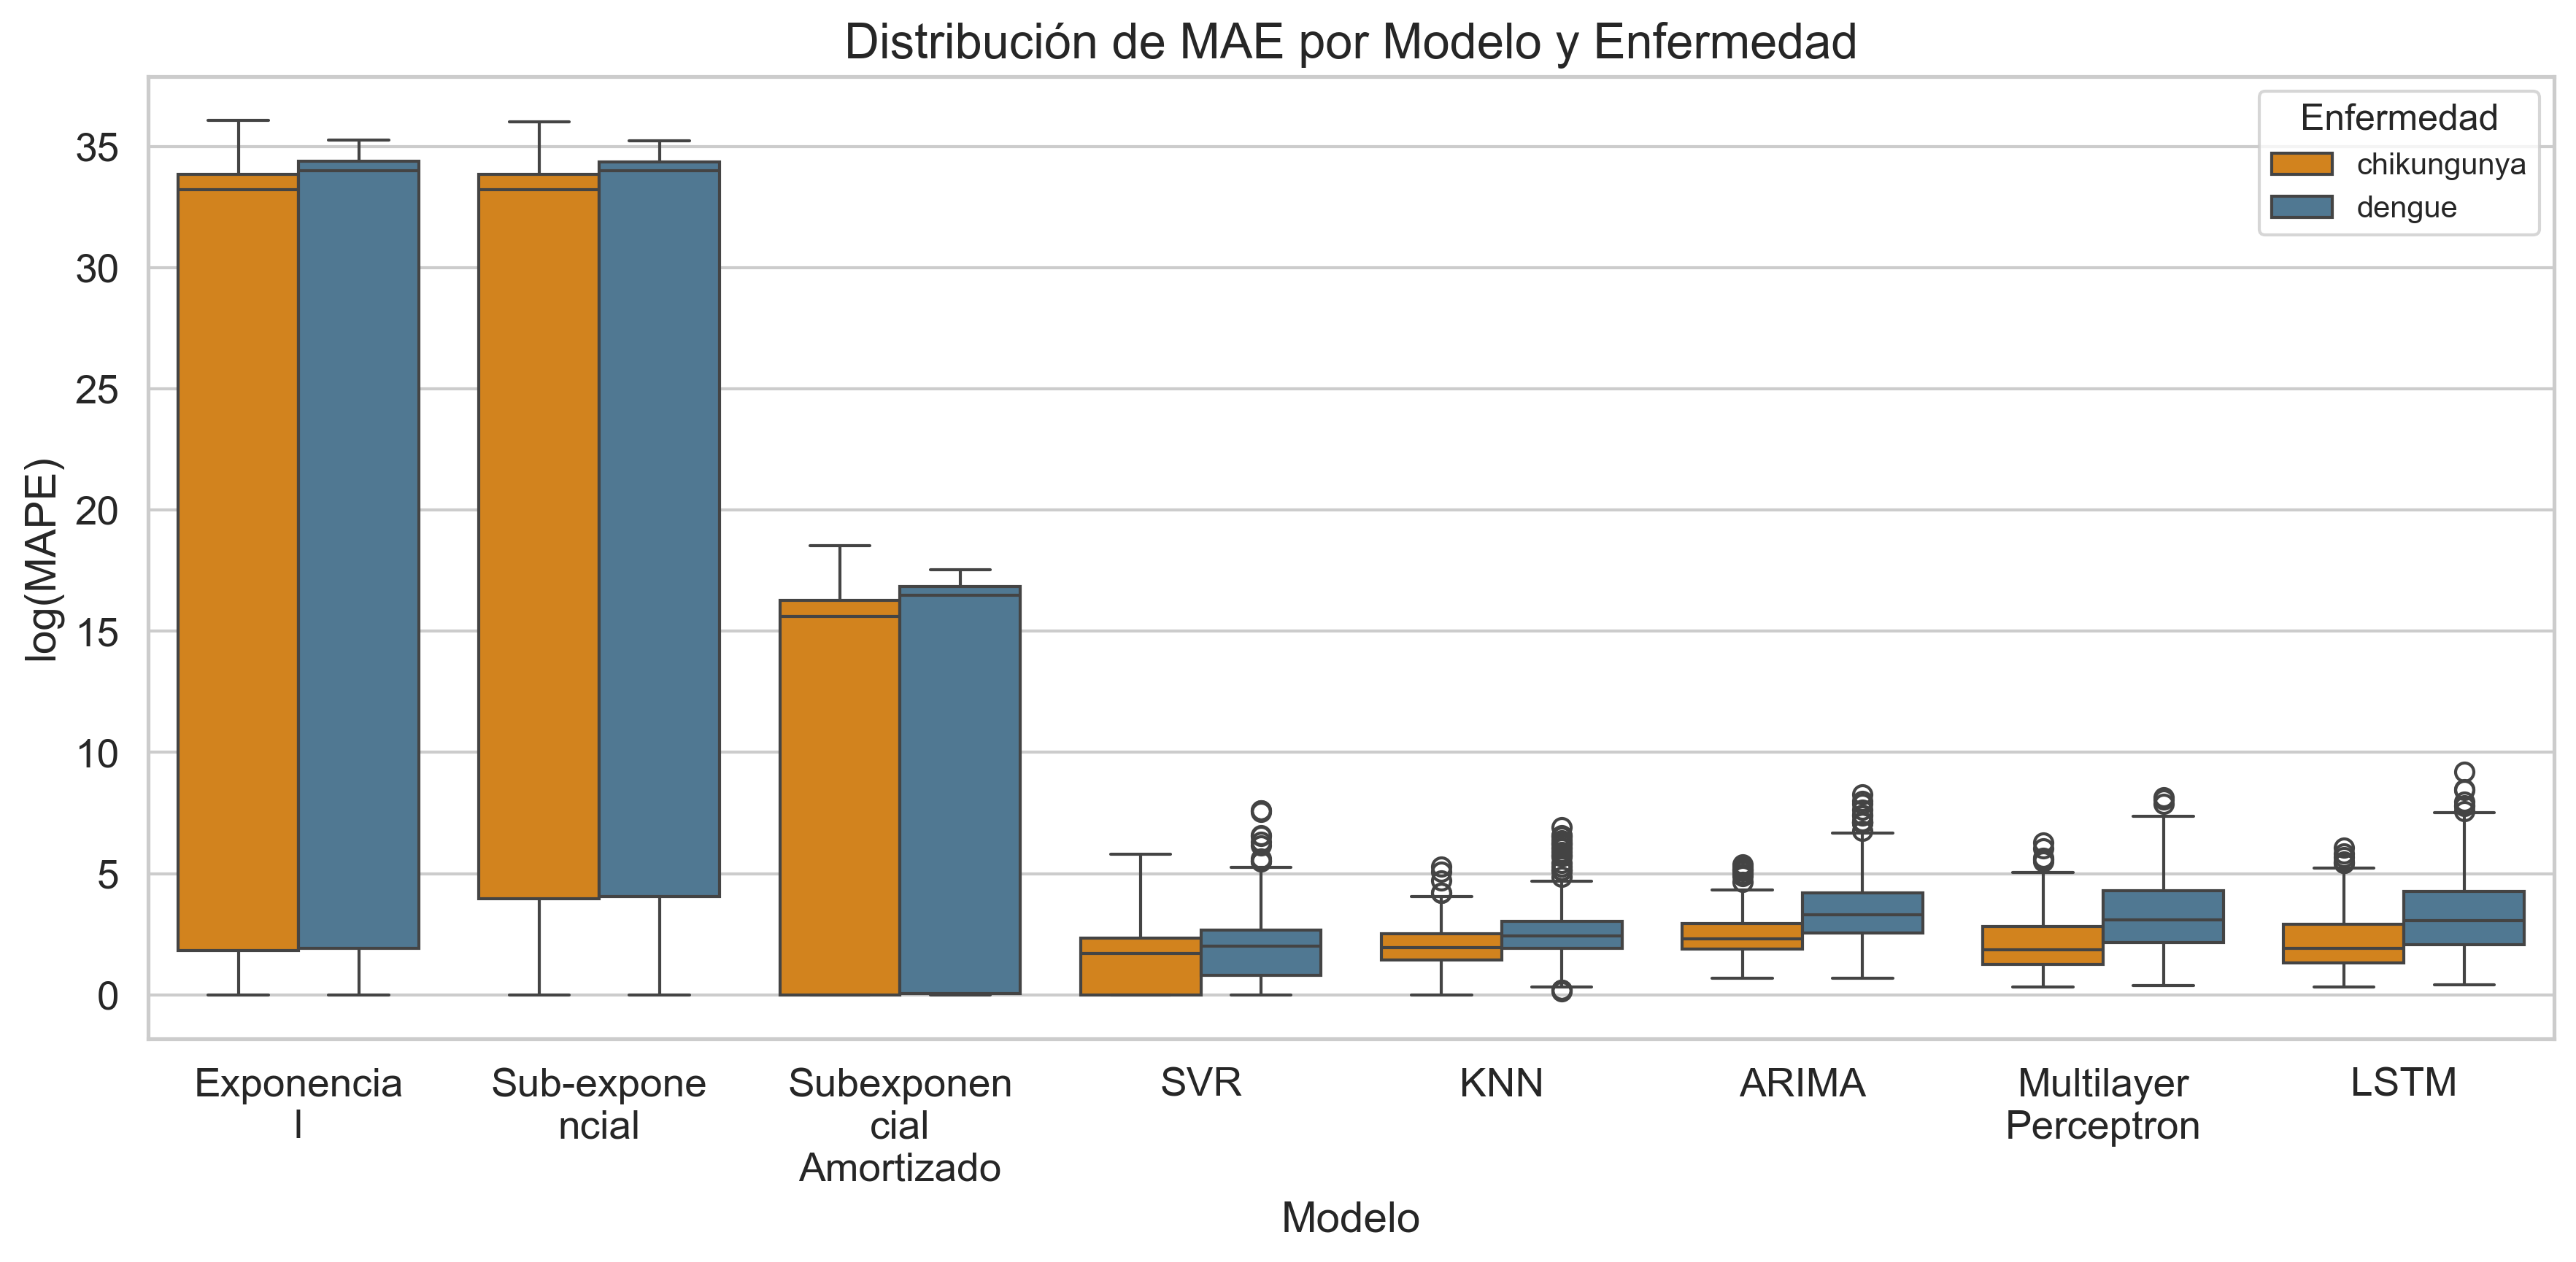

In [32]:
df['log_MAPE'] = np.log1p(df['MAPE'])
# Colores personalizados
palette = {"chikungunya": "#F08700", "dengue": "#457B9D"}

plt.figure(figsize=(12, 6))
orden_metodos = ["exponential", "subexponential", "subexponential amortized",
                 "svr", "knn", "autoarima", "mlp", "lstm"]

ax = sns.boxplot(
    data=df,
    x="Method",
    y="log_MAPE",
    hue="Disease",
    palette=palette,
    order= orden_metodos
)

# Cambiar etiquetas del eje X a nombres más descriptivos
new_labels = {
    "exponential": "Exponencial",
    "subexponential": "Sub-exponencial",
    "subexponential amortized": "Subexponencial Amortizado",
    "autoarima": "ARIMA",
    "svr": "SVR",
    "knn": "KNN",
    "mlp": "Multilayer Perceptron",
    "lstm": "LSTM",

}

# Obtener las posiciones y aplicar los nuevos labels
labels = [textwrap.fill(new_labels.get(label.get_text(), label.get_text()), width=10)
          for label in ax.get_xticklabels()]
ax.set_xticklabels(labels)

# Títulos y etiquetas
ax.set_title("Distribución de MAE por Modelo y Enfermedad", fontsize=16)
ax.set_xlabel("Modelo", fontsize=14)
ax.set_ylabel("log(MAPE)", fontsize=14)

# Leyenda más clara
ax.legend(title="Enfermedad", title_fontsize=12, fontsize=10)

plt.tight_layout()
plt.savefig("boxplot_mape_method_disease.png", dpi=300)
plt.show()

In [ ]:
# LINEPLOT: MAE promedio por semanas de predicción (evolución temporal), facet por Disease
g = sns.relplot(
    data=df, x="Prediction Weeks", y="MAE", hue="Method", kind="line",
    col="Disease", col_wrap=2, height=4, aspect=1.5, marker="o", ci=None
)
g.set_titles("{col_name}")
g.set_axis_labels("Semanas de predicción", "MAE promedio")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Evolución temporal del MAE promedio por Modelo y Enfermedad")
plt.savefig("lineplot_mae_method_disease.png")
plt.show()

# HEATMAP: MAE promedio por Método y Nivel
pivot = df.pivot_table(index="Method", columns="Level", values="MAE", aggfunc="mean")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("MAE promedio por Método y Nivel geográfico")
plt.xlabel("Nivel geográfico")
plt.ylabel("Modelo")
plt.tight_layout()
plt.savefig("heatmap_mae_method_level.png")
plt.show()

# OPCIONAL: Violinplot de MAPE por método y enfermedad
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x="Method", y="MAPE", hue="Disease", split=True, inner="quartile")
plt.title("Distribución de MAPE por Modelo y Enfermedad")
plt.xlabel("Modelo")
plt.ylabel("MAPE")
plt.legend(title="Enfermedad")
plt.tight_layout()
plt.savefig("violinplot_mape_method_disease.png")
plt.show()


TypeError: agg function failed [how->mean,dtype->object]